<center>
<img src="https://drive.google.com/uc?export=view&id=1jkD3GL8CPA-XT9CIl-urSvuHMQXq4bEO" width="500"  style="vertical-align:middle">

$$ \Large EN2053 - Communication \space Systems\space and \space Networks $$

$$ Assignment \space 1$$
<hr>



<center><em>190388D M.M. Mathotaarachchi</em></center><br>

<center><em> 190636M A.G.N. Udara </em></center><br>

<center><em> 190423H M.N.M. Nushath  </em></center><br>

<hr>



<h1><center><em>Intoduction</em></center></h1>


For this assignment we are going to use Python to simulate and calculate required scenarios and visualize the practiacl aspects of a communication system.

$\color{red}{\text{ We are using Jupiter notebook to create this documant.}}$

<hr>

<h1><center><em> Method</em></center></h1>

Now we will take step by step approch to simulate all the given scenarios.



<hr>

$Question \space a$

To interprite a CRC encoder and a decoder, we need to follow common essential step of doing modulas 2 division between two binray codewords. So we will define a function for this action, named $mod2div$ with two input parameters. First one is the Dividend, and the second one is the Divisor. Also the mentioned function will need an additioal function to do bitwise XOR for two string variables, it is defined as $mod2add$

In [1]:
def mod2add(a, b):
    output = []

    ###bitwise xor
    for i in range(1, len(b)):
        if a[i] == b[i]:
            output.append('0')
        else:
            output.append('1')

    return ''.join(output)


def mod2div(divident, divisor):
    var = len(divisor)
    ## slice the divident upto the length of divisor
    temp = divident[0: var]

    while var < len(divident):

        if temp[0] == '1':

            ## implement the modulo 2 addition 
            ## and bring 1 bit down
            temp = mod2add(divisor, temp) + divident[var]

        ## if the leftmost bit is 0 then 
        ## we must use divisor with zeros only
        else:  
            temp = mod2add('0' * var, temp) + divident[var]

        # increment var
        var += 1

    ## with modulo 2 addition we can 
    ## end up with the reminder
    if temp[0] == '1':
        temp = mod2add(divisor, temp)
    else:
        temp = mod2add('0' * var, temp)

    checkword = temp
    return checkword

<b>Here, we will compare bit lengths and calculate only remainder. It will give us the remainder as the output.</b>

Now we can easily define $encode$ and the $decode$ functions with the use of above $mod2div$ function.

In the $encode$ funtion you have to give the two parameters, the data and the Divisor respectively.

And in the $decode$ function you have to give the codeword and the Divisor respectively.

In [2]:
def encode(dataword,divisor):
  ## encode the dataword 
  ## using CRC w.r.t common divisor

  ## adding zeros to the end
  dividend=dataword + ("0"*(len(divisor)-1))

  ## using modulo 2 divition, find the reminder
  rem=mod2div(dividend,divisor)

  ## add the reminder to the end of dataword
  ## instead of zeros, output the encoded codeword
  codeword=dataword+rem
  return (codeword) 


def decode(codeword,divisor): 
  ## take the encoded codeword and check for errors
  ## and return the decoded dataword

  ## with modulo 2 divition check
  ## wether syndrome is zero(error occured)
  syndrome=mod2div(codeword,divisor)

  if syndrome=="0"*(len(divisor)-1):
    ## output dataword by removing the extra bits
    return codeword[0:(len(codeword)-len(divisor)+1)], syndrome
  else:
    ## output error string when error occured
    return 'error', syndrome

<b>The $encode$ function will take the dataword and the Divisor and genarate the CRC using the $mod2div$ and attach it to the end of the dataword and return the genarated codeword.</b>

<b>The $decode$ function will take the received codeword and the comman Divisor, after that it will check the syndrom to check whether the received code is corrupted or not. If not corrupted, return the extracted dataword and the syndrom, If it is corrupted, return "error" and the syndrom.</b>

<hr>

$Question \space b$

Now we will try above function $encode$ and find the CRC, with the sample data given

*   Dataword :- $101001111$
*   Divisor :- $10111$


In [3]:
dataword ='101001111'
divisor ='10111'
codeword=encode(dataword,divisor)
print(codeword)

1010011110101


<b>For the given sample data, this will print the CRC code</b>

<hr>

$Question \space c$

Now we will test the $decode$ function under error free mode and find show that it is actually error free. Here we will use the Divider given above and the codeword genrated by the $encode$ above.

In [4]:
dataword, syndrome = decode(codeword,divisor)
print(f'Dataword: {dataword}')
print(f'Syndrome: {syndrome}')

Dataword: 101001111
Syndrome: 0000


<b>Since we did not introduce any errors to the genarated codeword, there will be no errors at the receiving end so, the decoder will not detect any errors</b>

<hr>

$Question \space d$

To impliment a Binary symmetric channel (BSC) with a given error probality for a each bit in a codeword, we will defie a function $BSC$. It will take 2 parameters. The codeword and the bit error probability. This will genrate a new codeword with possible bit errors.


In [5]:
import random

In [6]:
def BSC(codeword,p):
  # initialize result
  result = ""
  
  ## bitwise error will occure with the
  ## prob of p
  for bit in codeword:
    
    ## error will occure in random
    if random.random()<p:
      if bit=="0":
        result+="1"
      else:
        result+="0"
      #flip the bit
      
    else:
      ## if no error same bit will be replaced
      result+=bit
  return result

<b>Here, to impliment a random varible, we are using the built-in $random$ library. It ( $random.random()$ function ) will generate a random float between 0 and 1, including 0. With our given bit error probaility, we will compare this value and take whether a bit error occurred or not.</b> 
<em>The value of p should be within 0,1 range</em>

<hr>

$Question \space e$

Now given that bit error probaility $p=0.5$ impliment a connection between $encode,\, decode$ using the $BSC$ function, for the given dataword and divider above.


In [7]:
p=0.5
print(codeword)
recieved_Codeword = BSC(codeword, p)
dataword, syndrome = decode(recieved_Codeword, divisor)
print(f'Dataword: {dataword}')
print(f'Syndrome: {syndrome}')

1010011110101
Dataword: error
Syndrome: 0001


<b>Since we introduced a bit error for the connection between sender and reciver, Now there is a possibility of error occurance. Here we get a non-zero remainder becouse of this.</b>

<hr>

$Question \space f$

Now we will generate random datawords with 9bits. The generated datawords are stored in string form inside a list containing all 1,000 datawords.
These will be encoded and will be transmitted though the $BSC$.We are using the same divisor as befor for the encoding.

In [8]:
binary_seq_A=['{0:09b}'.format(random.getrandbits(9)) for i in range(1000) ] ## genrate 10^3 datawods with 9 bits.


<b> Here we genarate 9bit codewords. Note that the bitwords can have "0' in the front.</b>

In [9]:
binary_encoded_seq_A=[encode(i, divisor) for i in binary_seq_A] ##encode and store for the late use

<b>These generated datawords are encoded in the 2nd line.</b>

We will calculate error rates using formula,

$$\frac{N_e}{10^3}$$

$N_e$ stands for the number of codewords that got corrupted while traveling through our $BSC$ with the given error probaility.

The $error\_rate$ function will take the encoded binary sequance, divisor and the bit error probability in the $BSC$. It will first send the data through the $BSC$ and then chack for errors by decoding. 

In [10]:
def error_rate(binary_seq,divisor,p):
  Ne=0
  received_binary_seq=[]
  for i in binary_seq:    
    received_i = BSC(i,p)  #send the respective codewords
    received_binary_seq.append(received_i)

  for j in received_binary_seq: #check the state of codewods at the end
    dataword = decode(j,divisor)[0] #remove the syndrom and take codeword
    if dataword == 'error': #If there is an error
      Ne += 1

  error_rate = Ne/(10**3) #take the error rate
  return error_rate

<b> This will return error rate directly.</b>

These codewords are now will be transmitted through the $BSC$ with the error probailities from $0$ to $0.1$ in $0.01$ increments. There will be total of 11 deferent scenarios. 

In [11]:
error_rates_list=[]
for i in range(0,11):
  p=i*0.01
  error_rates_list.append(error_rate(binary_encoded_seq_A, divisor, p))
print(error_rates_list)

[0.0, 0.119, 0.236, 0.35, 0.379, 0.475, 0.554, 0.584, 0.637, 0.693, 0.718]


<b>Send the same codewords through the $BSC$ and get the Error rates and store in a list for the later usage.</b>

Now to compare each scenario we will plot Error probability Vs $N_e$ in a graph. Using Matplotlib

In [12]:
import matplotlib.pyplot as plt

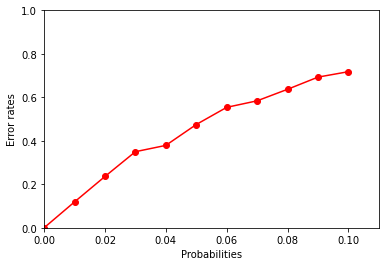

In [13]:
x_axis=[i*0.01 for i in range(0,11)] #the domain for the discrete graph.

plt.plot(x_axis,error_rates_list, '-or')
plt.axis([0, 0.11, 0, 1])               #Minimize the range to get a better view
plt.xlabel('Probabilities')
plt.ylabel('Error rates')
plt.show()

<b> We can see the error rate is increasing with the error probability. But it is not linear. For the $p=0$ we get zero error rate as intended.</b>

<hr>
<center><h1>Now we will impliment the Stop and Wait ARQ</h1></center>



<hr>

$Question \space g$

To Impliment the ARQ process, first we will implement the encapsulation and decapsulation process.

The $encapsulation$ and $decapsulation$ functions will add or remove SN/RN at the required places. The SN/RN will have 8 bits to consider.
Since we are not considering any package losts in this ARQ, we will take the time out to be

$$ Time\;out=(Propergation\;delay + Transmission\;delay)\times2 $$

$$ = 80\mu S$$

In [14]:
def encapsulation(dataword, num):
    ## add the RN/SN at the 
    ## end of the dataword

    ## convert the RN/SN into bit string
    bitArray = bin(num).replace('0b','')
    x = bitArray[::-1]

    while len(x) < 8:
        x += '0'
    bitArray = x[::-1]

    return dataword + bitArray
  
def decapsulation(frame):
    ## remove the RN/SN from the dataword 
    return frame[:-8]

We are using global varables to communicate between the sender and reciver functions. So we need to initialize or reset those variables for each transmission process.
$initialize$ function will take the channel bit error probability and initialize the required variables upon call.

In [15]:
def initialize(probability):
    ## initialize the global variables
    global p, sequence_num, RN, sent_frames, SN_overload, divisor, encoded_feedback_frame, retrns
    
    p = probability                                         #error probability
    sequence_num = 0                                        #set initial sequence number as 0
    RN = 0                                                  #set initial request number as 0
    sent_frames = 0                                         #total no. of successful transmissions
    SN_overload = False                                     #sequence number bits reached it's max capacity(overflow)
    divisor = '100000111'                                   #CRC divisor
    encoded_feedback_frame = '{:032b}'.format(0)            #as initial RN set 0, inital feedback encoded frame as zeros 
    retrns = 0                                              #The number of failed attempts.

<b> The $SN\_overload$ is there to check if there are more then 256 codewords. Becouse we cannot represent a number larger then 256 with the given byte. So it will take care a scenario in a case you need to send more than 256 codewords</b>

Now we will define core functions for our Stop and Wait ARQ. Here we thought of adding a real time delays to the algorithm, for both propagation and transmission there are delays of $25\mu S$ and $15\mu S$ for both directions.

We will be using the in-built library $time$ and from that, we will use $sleep$ function to give respective time delays.

In [16]:
from time import sleep

In [17]:
def transmissionDelay():                    #transmission delay 25us, both direction
    sleep(25/1000000)
    return

def propagationDelay():                     #propagation delay 15us, both direction
    sleep(15/1000000)
    return

def sender():
    ## this function will handle all the operations
    ## carried by the sending end

    global snd_codeword, frame, sequence_num, sent_frames, encoded_feedback_frame, SN_overload, retrns

    ## recieving ACK through BSC
    rcv_RN = BSC(encoded_feedback_frame, p)

    ## decoding recieved ACK w.r.t common divisor                                   
    decoded_RN = decode(rcv_RN, divisor)[0]

    ## if decoded ACK don't have an error, convert it to integer
    ## if SN<RN or SN bits overflowed, 
    ## increment the succuessfully transmitted frames and assign SN = RN
    if decoded_RN != 'error': 
        decoded_IntRN = int(decoded_RN[-8:],2) 

        if sequence_num<decoded_IntRN or SN_overload:
          sequence_num = decoded_IntRN

          ## sender will keep the count of the frames
          ## succussfully sent                                 
          sent_frames +=1


        if sequence_num ==255:

          ## if SN reached it's max capacity sender will
          ## set the SN_overload as True
          SN_overload = True

        else:
          SN_overload = False
    else:
        retrns += 1
    

    ## take the (sent_frame-1)th frame from the buffer 
    ## and encapsulate with SN
    frame = encapsulation(buffer_data[sent_frames-1], sequence_num)  

    #encode the encapsulated frame(dataword+SN+CRC)
    snd_codeword = encode(frame,divisor)  

    transmissionDelay()
    propagationDelay()

    return None

def reciever():
    ## this function will handle all the operations
    ## carried by the recieving end

    global rcv_codeword, RN, encoded_feedback_frame, retrns
    
    ## recieving the encoded frame through the BSC
    ## decode the recieved encoded frame w.r.t common divisor
    rcv_codeword = BSC(snd_codeword, p)                            
    decoded_codeword = decode(rcv_codeword,divisor)[0]                

    ## if recieved encoded frame decoded succussfully 
    ## fetch the SN out and check with RN
    if decoded_codeword !='error':
        if RN == int(decoded_codeword[-8:],2):

           ## if RN does not reach the max limit increament the RN
           ## if RN reached the max, set RN = 0                       
            if RN != 255:                                           
              RN += 1
            else:                                                   
              RN = 0 

              ## successfully transmitted dataword 
              ## which is eligible to pass to the network layer          
            networklayer_dataword = decapsulation(decoded_codeword)  
            #print(networklayer_dataword)
    else:
        retrns += 1
    
    ## assume feedback side dataword as 0 
    ## and encapsulate RN with that dataword
    ## encode feedback_frame w.r.t common divisor
    feedback_frame = encapsulation('{:016b}'.format(0),RN)
    encoded_feedback_frame = encode(feedback_frame,divisor) 


    transmissionDelay()
    propagationDelay()

    return

<b> Here we have all the required buildings blocks to implement a Stop and Wait ARQ.</b>

<hr>

$Question \space h$

We will genarate 256 16bit datawords randomly.

In [18]:
## initilize 256 bit strings with 2bytes long 
buffer_data =['{0:016b}'.format(random.getrandbits(16)) for i in range(256) ]

Now we will do a transmission for bit error probability,

$$p=0.0002$$
For that we will call the $initialize$ function with parameter 0.0002.


In [19]:
initialize(0.0002)

## main function where accual transmission happens
while True:
  ## send and recieve frames reach untill the the condition met                                   
  sender()
  reciever()

  #print(f'frame recieved {sent_frames}')

  ## if total sent frames are equal to buffer data length 
  ## stop the transmission                              
  if sent_frames == len(buffer_data):
    print(f'no. of retransmissions with error probability {p} : {retrns}')          
    break

no. of retransmissions with error probability 0.0002 : 5


<b> We will get how many retransmissions were required to transmit all 256 frames from sender to reciver.
The expected number of <u>retransmissions</u> required for a codeword to be sent,</b>

$$Expected\;of\;retransmissions=\frac{Number\;of\;total\;retransmissons}{Total\; nuumber \; of\; codewords}$$

$$Expected\;value\;of\;retransmissions=\frac{5}{256}$$

$$Expected\;value\;of\;retransmissions=1.953125\times10^{-2}$$


<hr>

$Question \space i$

Now we will do a new transmission with bit error probability in the channel,

$$p=0.0006$$

It will use the same above mentioned steps with exception of the paramiter passed to the $initialize$ function.

In [40]:
initialize(0.0006)

## main function where accual transmission happens
while True:
  ## send and recieve frames reach untill the the condition met                                   
  sender()
  reciever()

  #print(f'frame recieved {sent_frames}')

  ## if total sent frames are equal to buffer data length 
  ## stop the transmission                              
  if sent_frames == len(buffer_data):
    print(f'no. of retransmissions with error probability {p} : {retrns}')          
    break

no. of retransmissions with error probability 0.0006 : 11


<b>

$$Expected\;value\;of\;retransmissions=\frac{11}{256}$$

$$Expected\;value\;of\;retransmissions=4.296875\times10^{-2}$$

We can see that the expected number for a codeword to transmit through the channel has been increased. It is as expected becouse the bit error probability has increased.</b>

<hr>

$Question \space h$

We can get the channel efficiency from the simulated data. Since we have the expencted values of successful codeword transmissions we can give the channel efficiency by the equation,

$$Channel\; utilization =\frac{Transmission\; delay}{(Propergation\;delay+Transmission\;delay)\times2\times{Expected\;Value}}$$


for 

$$p=0.0002$$

$$Expected\;value(from\;simulation)=\frac{256+5}{256}$$
$$=1.01953125$$

$$Channel\; utilization =\frac{25\mu S}{(15\mu S+25\mu S)\times2\times{1.01953125}}$$

$$=30.651341 \,\%$$

for 

$$p=0.0006$$

$$Expected\;value(from\;simulation)=\frac{256+11}{256}$$
$$=1.04296875$$

$$Channel\; utilization =\frac{25\mu S}{(15\mu S+25\mu S)\times2\times{1.04296875}}$$

$$=29.96254682\,\%$$
